In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\USER\Downloads\ClimateEngine.csv")
df

,Unnamed: 0,"(mm) Precipitation (CHIRPS) at Polygon 1, 1981-01-01 to 2023-05-31"
0,1981-01-01,0.0000
1,1981-01-02,0.0000
2,1981-01-03,0.0000
3,1981-01-04,0.0000
4,1981-01-05,0.0000
...,...,...
15486,2023-05-27,4.1086
15487,2023-05-28,0.0000
15488,2023-05-29,0.0000
15489,2023-05-30,0.0000


In [2]:
df.size

30982

In [3]:
df.rename(columns={'(mm) Precipitation (CHIRPS) at Polygon 1, 1981-01-01 to 2023-05-31':'precipitation','Unnamed: 0':'Date'},inplace=True)

In [4]:
df

,Date,precipitation
0,1981-01-01,0.0000
1,1981-01-02,0.0000
2,1981-01-03,0.0000
3,1981-01-04,0.0000
4,1981-01-05,0.0000
...,...,...
15486,2023-05-27,4.1086
15487,2023-05-28,0.0000
15488,2023-05-29,0.0000
15489,2023-05-30,0.0000


In [5]:
df.iloc[:,0:2].describe()

,precipitation
count,15491.00000
mean,9.68118
std,18.57394
min,0.00000
25%,0.00000
50%,0.03020
75%,12.29185
max,266.19660


In [6]:
# year=[]
# for i in range(df.shape[0]):
#     year.append(df.Date.astype(str)[i].split('-')[0])
#     #year.append(df.Date[i].split('-')[0])
df['Date']=pd.to_datetime(df['Date'])

In [7]:
grp=(df.iloc[:,0:2].groupby(by=
                            [df['Date'].dt.year]))

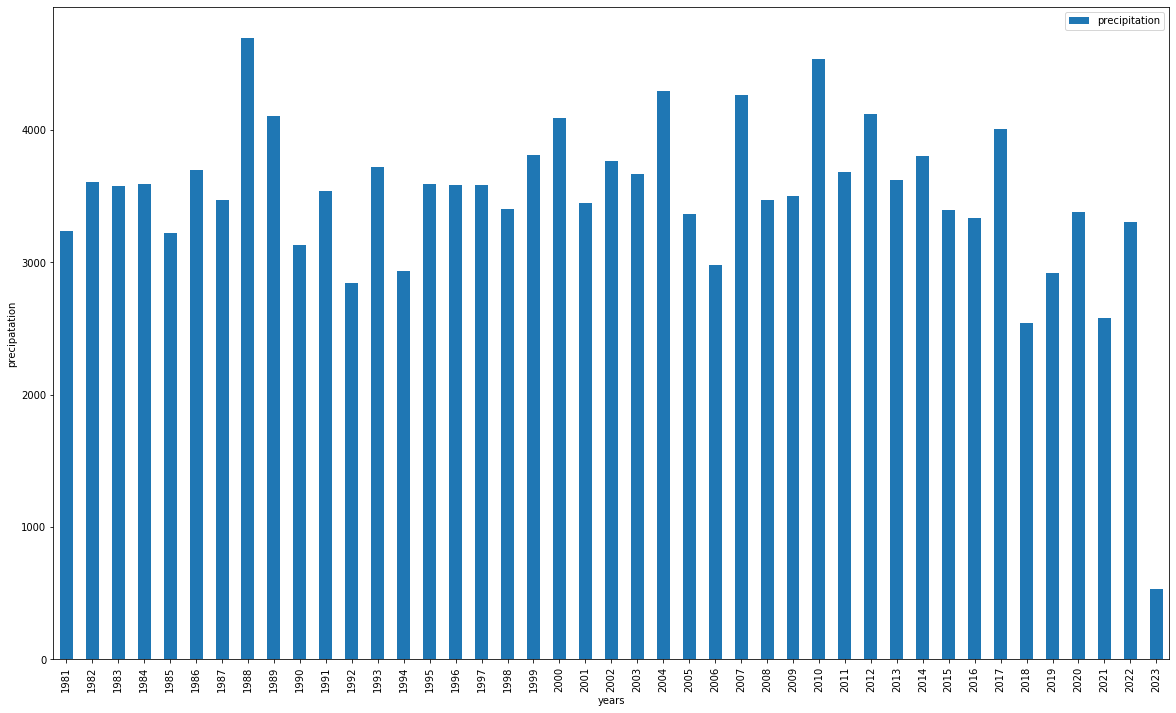

In [8]:
import matplotlib.pyplot as plt
grp.sum().plot(kind='bar',figsize=(20,12))
plt.xlabel('years')
plt.ylabel('precipatation')
plt.savefig('precipitation.jpg')

In [9]:
grp.sum()

,precipitation
Date,
1981,3236.6811
1982,3606.0102
1983,3578.8157
1984,3593.0886
1985,3219.5209
1986,3701.0588
1987,3472.8495
1988,4695.4756
1989,4103.9752


In [96]:
year=df['Date'].dt.year
# # year.reset_index(drop=True)
columns=year.values
col_year=np.unique(columns)
col_year

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

In [97]:
# df.loc[df.Date.dt.year==1990]['precipitation'].ravel()

In [98]:
yearwise={}
for i in col_year[0:-1]:
    yearwise[i]=df.loc[df.Date.dt.year==i]['precipitation'].ravel()
#     print(i)


In [99]:
year_wise=pd.DataFrame.from_dict(yearwise,orient='index').transpose()
year_wise

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.0000,2.3746,0.0000,4.8435,38.4702,0.0000,6.6978,4.6354,0.0000,25.9650,...,7.2069,7.9144,9.4395,2.3071,0.0000,3.2603,5.2035,0.0000,0.0000,10.3097
1,5.8961,0.0000,0.0000,8.2702,5.6829,0.0000,0.0000,0.0000,0.0000,10.1688,...,2.5996,0.0000,3.7791,7.1821,6.6166,0.0000,6.7363,6.6405,13.1057,2.8923
2,0.0000,0.0000,4.2455,7.4492,36.5179,0.0000,0.0000,6.6280,0.0000,4.7924,...,4.9203,4.5988,0.0000,6.0569,7.0293,0.0000,8.4140,3.8841,30.1505,0.0000
3,0.7028,6.5344,6.2190,4.7623,6.8757,0.0000,2.1176,7.2183,2.8582,0.0000,...,0.0000,8.2518,0.0000,6.2699,6.0940,7.3242,3.6564,0.0000,43.6789,3.4000
4,0.0000,4.6972,6.2190,6.3338,4.1147,1.3929,2.8082,12.4050,2.8582,0.7061,...,0.0000,5.3751,0.0000,7.3228,7.2130,5.5310,5.0107,3.6435,42.9863,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.0000,0.0000,0.0000,8.5447,0.0000,0.0000,0.0000,0.0000,12.2464,32.4494,...,6.4341,0.0000,3.4637,0.0000,6.8217,28.1512,73.1636,0.0000,14.8225,7.5500
362,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12.5202,0.0000,...,5.2984,0.0000,0.0000,14.4292,5.5401,29.9330,22.0329,0.0000,9.0736,0.0000
363,0.0000,4.3222,9.6631,3.1549,0.0000,3.8280,0.0000,0.0000,8.1418,0.0000,...,2.7766,1.4966,2.2799,0.0000,0.0000,0.0000,29.1617,0.0000,6.6381,7.0417
364,0.0000,4.3222,0.0000,6.7375,2.2243,3.8280,26.7792,0.0000,5.6585,7.4997,...,4.7508,4.9465,9.0879,0.0000,4.2291,5.1370,0.0000,4.3873,14.4768,0.0000


In [100]:
year_wise.round(2)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.0,2.37,0.00,4.84,38.47,0.00,6.70,4.64,0.00,25.96,...,7.21,7.91,9.44,2.31,0.00,3.26,5.20,0.00,0.00,10.31
1,5.9,0.00,0.00,8.27,5.68,0.00,0.00,0.00,0.00,10.17,...,2.60,0.00,3.78,7.18,6.62,0.00,6.74,6.64,13.11,2.89
2,0.0,0.00,4.25,7.45,36.52,0.00,0.00,6.63,0.00,4.79,...,4.92,4.60,0.00,6.06,7.03,0.00,8.41,3.88,30.15,0.00
3,0.7,6.53,6.22,4.76,6.88,0.00,2.12,7.22,2.86,0.00,...,0.00,8.25,0.00,6.27,6.09,7.32,3.66,0.00,43.68,3.40
4,0.0,4.70,6.22,6.33,4.11,1.39,2.81,12.40,2.86,0.71,...,0.00,5.38,0.00,7.32,7.21,5.53,5.01,3.64,42.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.0,0.00,0.00,8.54,0.00,0.00,0.00,0.00,12.25,32.45,...,6.43,0.00,3.46,0.00,6.82,28.15,73.16,0.00,14.82,7.55
362,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.52,0.00,...,5.30,0.00,0.00,14.43,5.54,29.93,22.03,0.00,9.07,0.00
363,0.0,4.32,9.66,3.15,0.00,3.83,0.00,0.00,8.14,0.00,...,2.78,1.50,2.28,0.00,0.00,0.00,29.16,0.00,6.64,7.04
364,0.0,4.32,0.00,6.74,2.22,3.83,26.78,0.00,5.66,7.50,...,4.75,4.95,9.09,0.00,4.23,5.14,0.00,4.39,14.48,0.00


In [101]:
# year_wise.set_index(df.Date.dt.month)

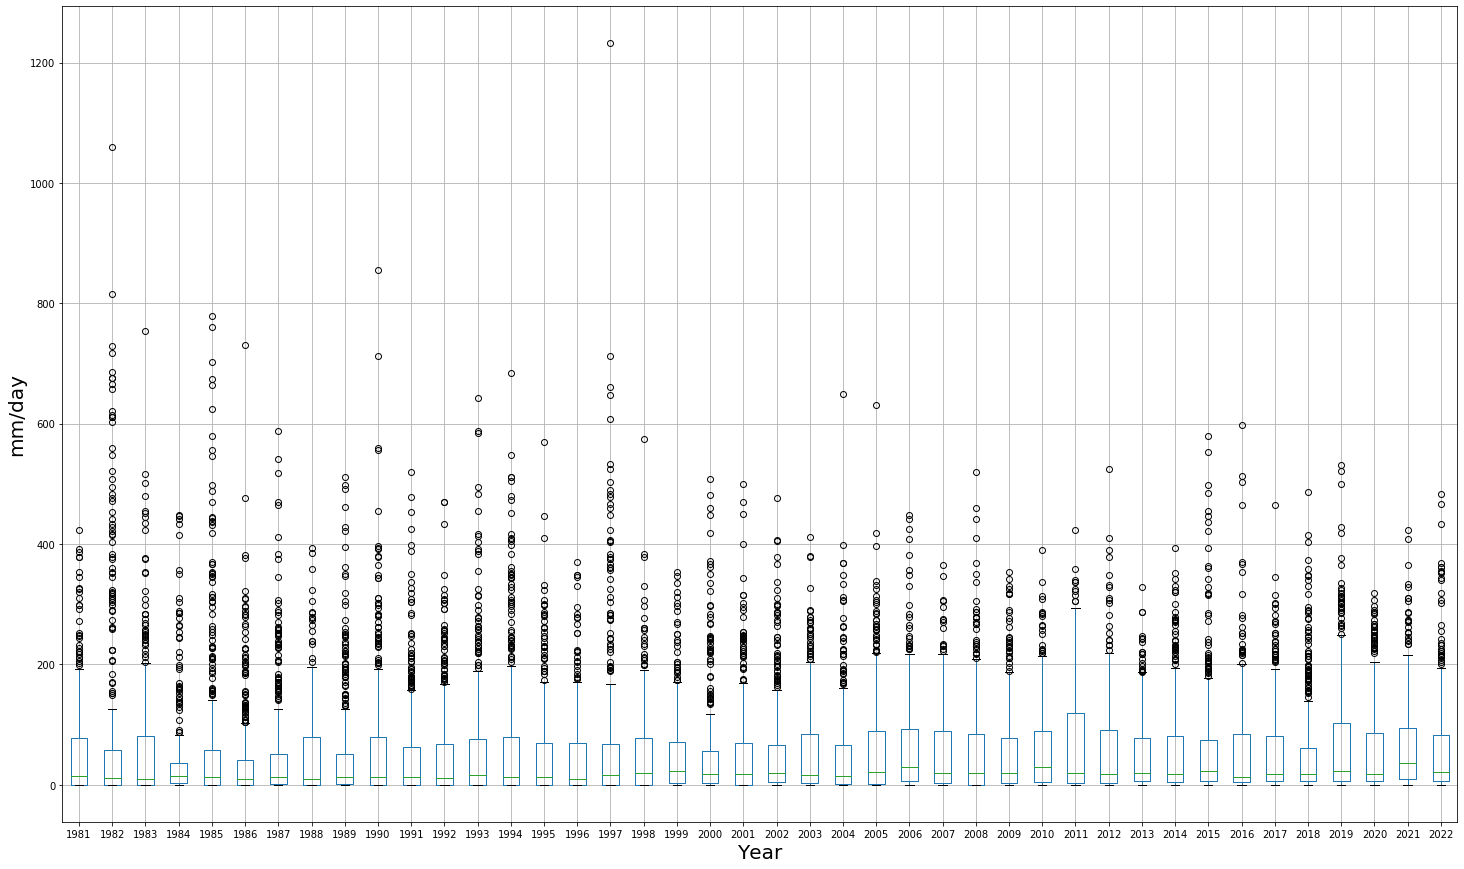

In [102]:
year_wise.boxplot(grid = True, figsize=(25,15))
plt.ylabel('mm/day',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.savefig('boxplot_prec_yearwise.jpg',bbox_inches='tight',dpi=300)

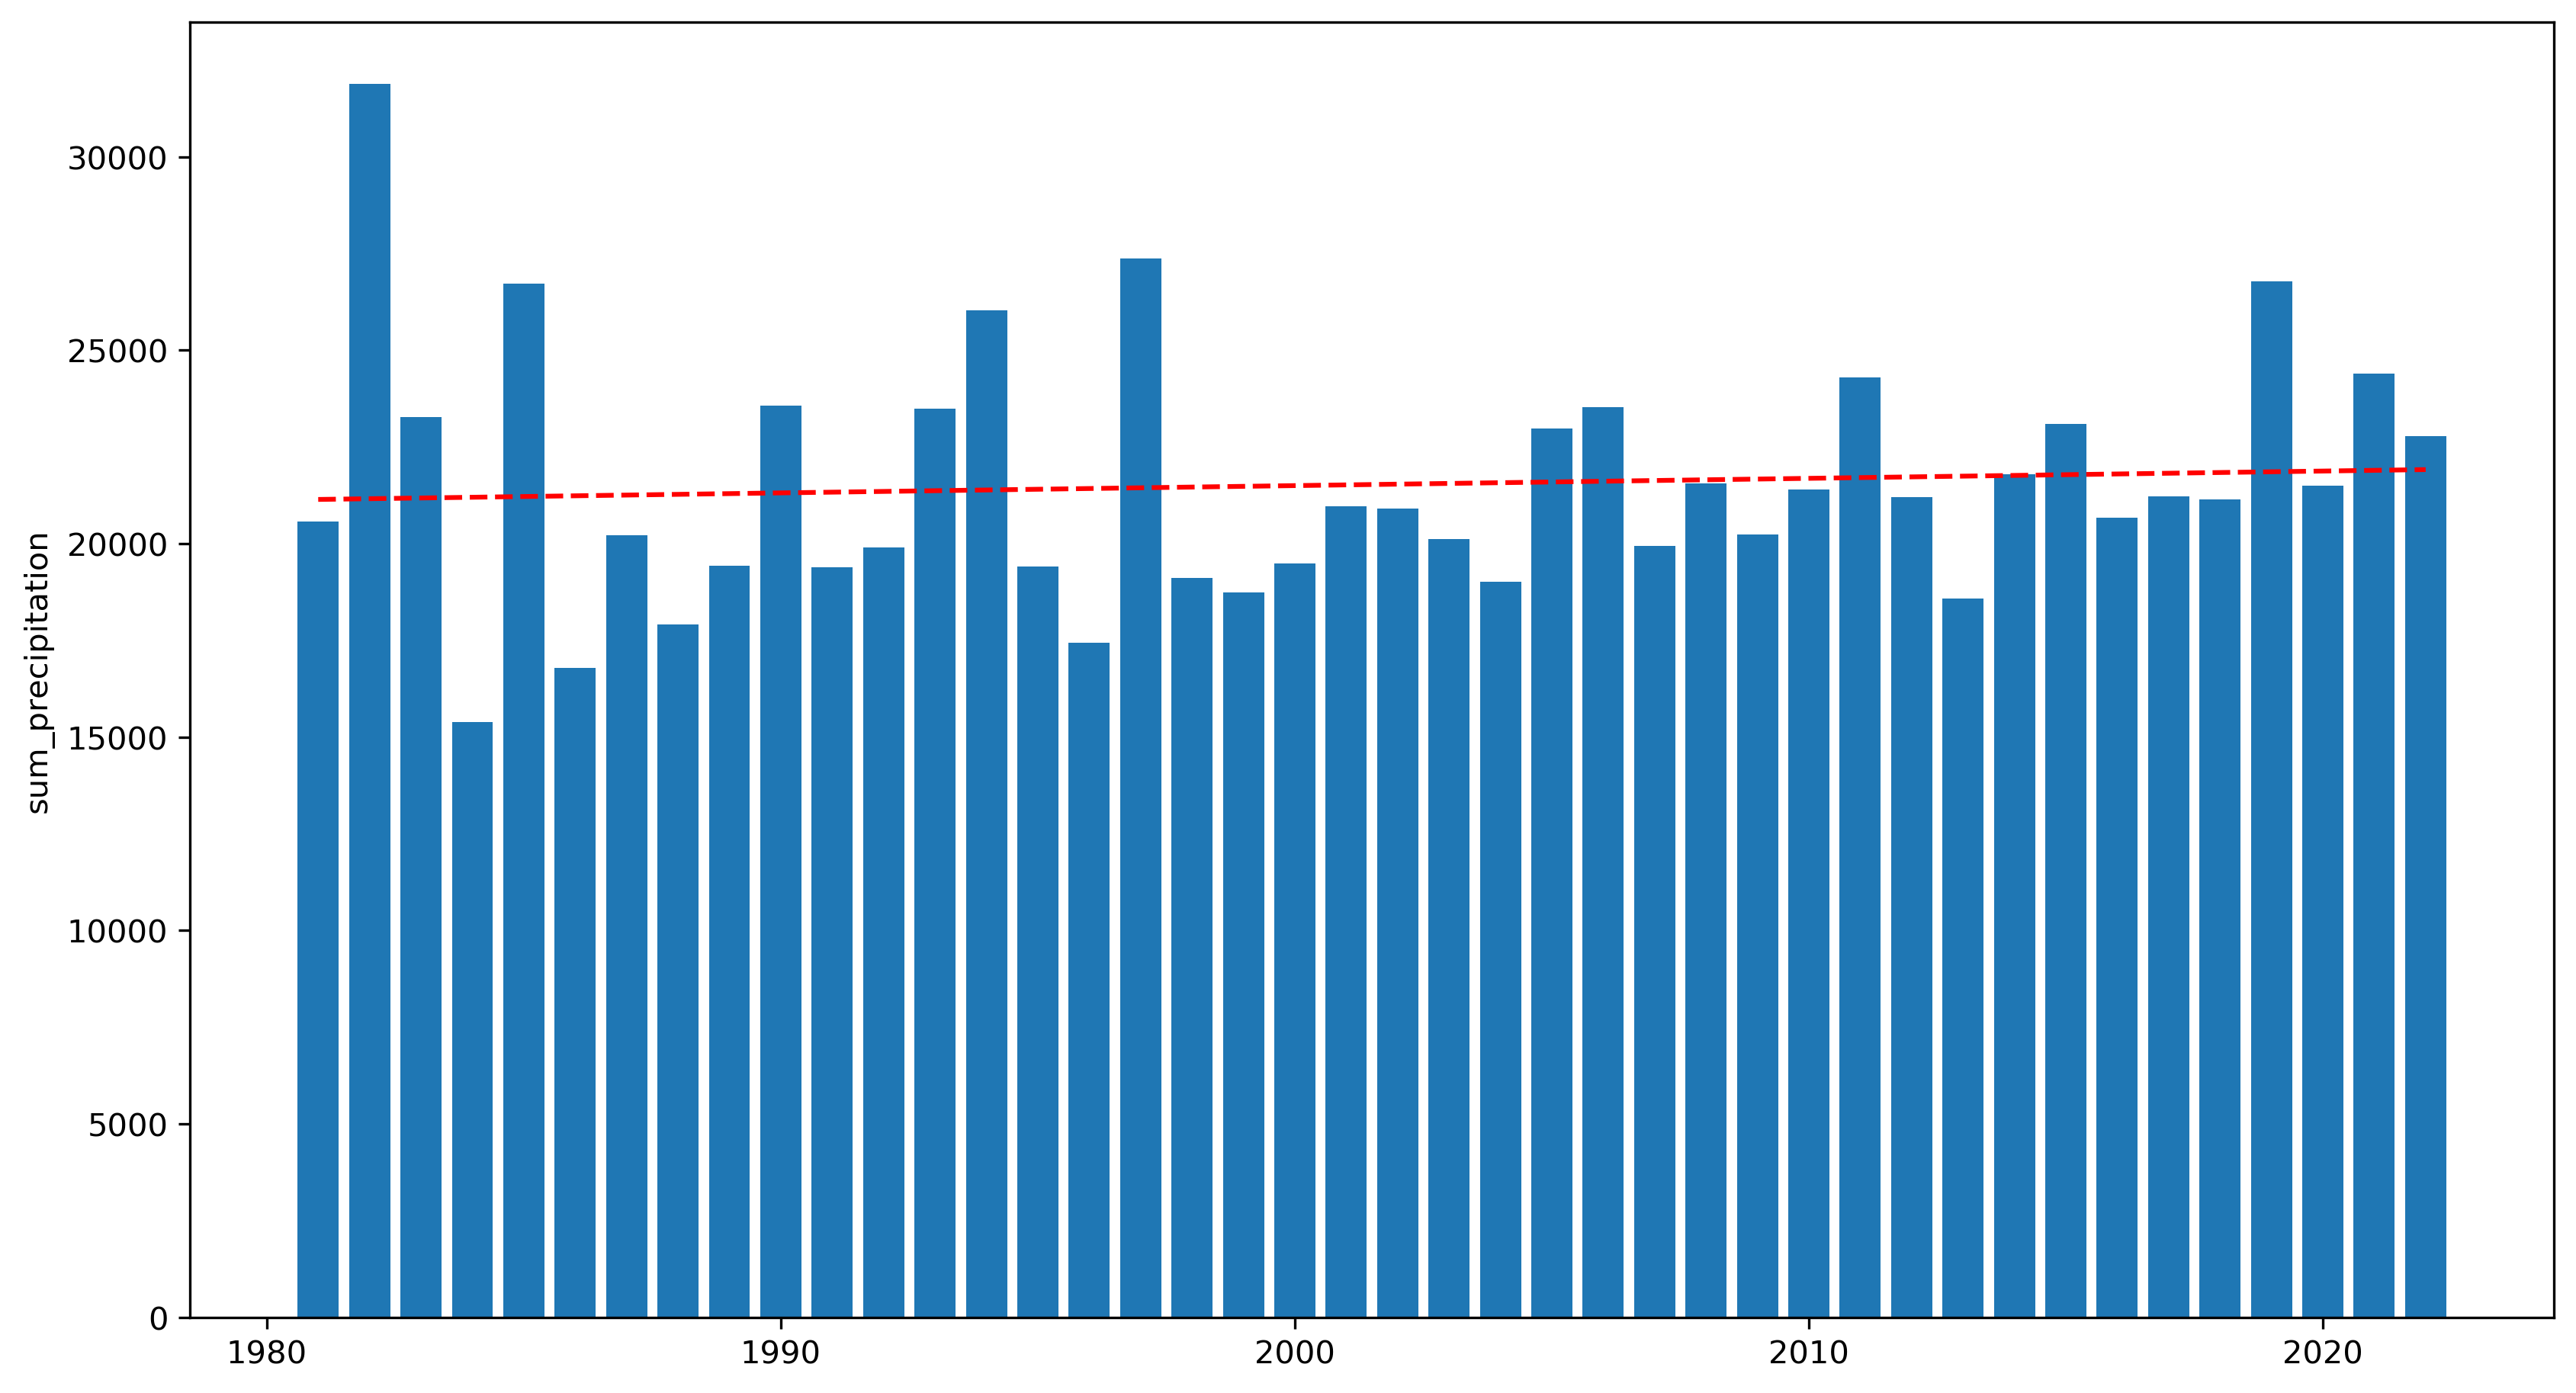

In [103]:
z = np.polyfit(col_year[0:-1],year_wise.sum(), 1)
p = np.poly1d(z)
fig = plt.figure(figsize = (13.33, 7.5),dpi=300)
plt.plot(col_year[0:-1],p(col_year[0:-1]),"r--")
plt.bar(col_year[0:-1],year_wise.sum())
# plt.plot(col_year[0:-1],year_wise.sum().mean())
# year_wise.sum().plot(figsize=(24,12))
plt.ylabel('sum_precipitation')
plt.savefig('sum_prec.jpg',bbox_inches='tight', dpi=300)

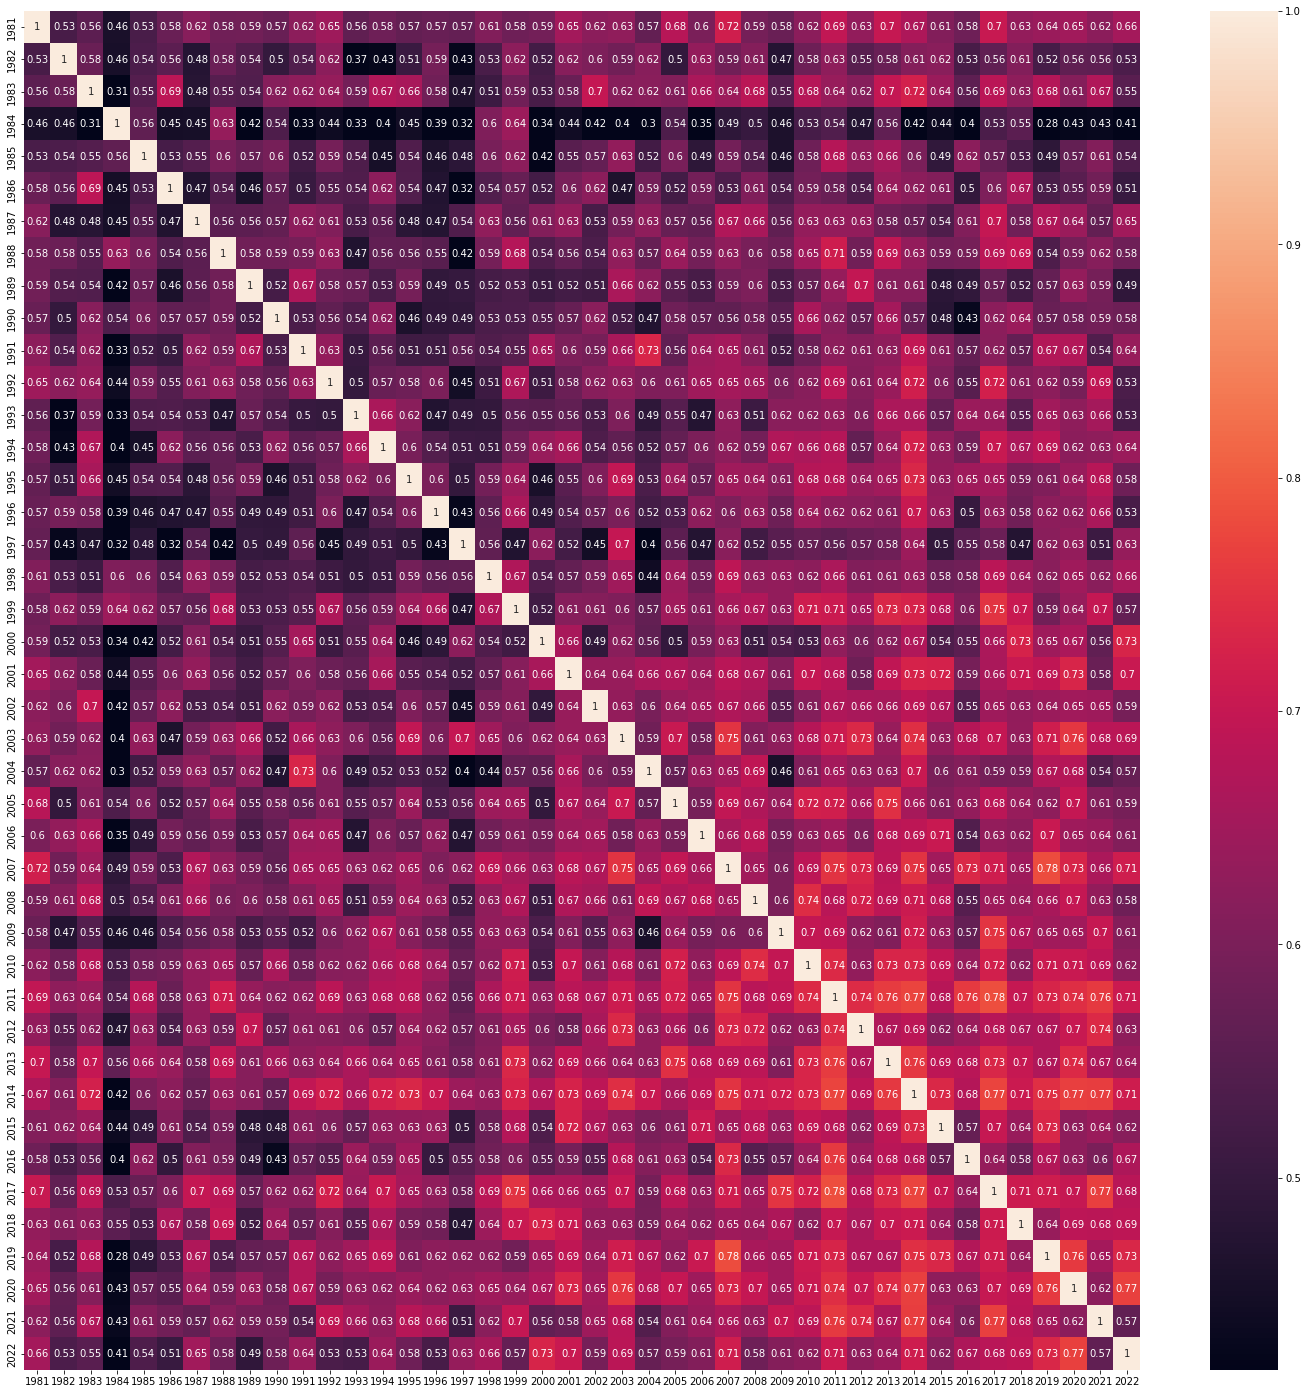

In [104]:
import seaborn as sn
fig, ax = plt.subplots(figsize = (25,25))
corr=year_wise.corr()
sn.heatmap(corr, annot = True, robust=True)

In [105]:
dates=pd.date_range('01-01-2020','31-12-2020')

In [106]:
year_wise.set_index(dates.month,inplace=True)

In [107]:
year_wise.iloc[0:90,:]

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,0.0000,2.3746,0.0000,4.8435,38.4702,0.0000,6.6978,4.6354,0.0000,25.9650,...,7.2069,7.9144,9.4395,2.3071,0.0000,3.2603,5.2035,0.0000,0.0000,10.3097
1,5.8961,0.0000,0.0000,8.2702,5.6829,0.0000,0.0000,0.0000,0.0000,10.1688,...,2.5996,0.0000,3.7791,7.1821,6.6166,0.0000,6.7363,6.6405,13.1057,2.8923
1,0.0000,0.0000,4.2455,7.4492,36.5179,0.0000,0.0000,6.6280,0.0000,4.7924,...,4.9203,4.5988,0.0000,6.0569,7.0293,0.0000,8.4140,3.8841,30.1505,0.0000
1,0.7028,6.5344,6.2190,4.7623,6.8757,0.0000,2.1176,7.2183,2.8582,0.0000,...,0.0000,8.2518,0.0000,6.2699,6.0940,7.3242,3.6564,0.0000,43.6789,3.4000
1,0.0000,4.6972,6.2190,6.3338,4.1147,1.3929,2.8082,12.4050,2.8582,0.7061,...,0.0000,5.3751,0.0000,7.3228,7.2130,5.5310,5.0107,3.6435,42.9863,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,3.3451,4.7931,0.0000,18.1592,26.4841,0.0000,0.0000,0.0000,8.0638,0.0000,...,3.0271,0.0000,18.8992,8.2566,5.2713,14.3137,15.2913,7.5844,15.4750,24.9211
3,20.3020,11.1520,0.0000,2.8265,25.4150,0.0000,0.0000,0.0000,5.0448,0.0000,...,0.0000,3.6993,11.8679,6.6229,10.9920,3.0654,2.8612,7.3455,29.7129,37.0501
3,6.0798,0.0000,0.0000,0.0000,19.7051,19.7699,0.0000,0.0000,2.0706,5.4010,...,2.8814,2.4865,5.0767,17.7719,5.8134,0.0000,9.5158,5.7101,33.0151,21.0813
3,4.5098,5.2445,3.2359,24.3322,26.2431,11.4569,7.5738,0.0000,7.3786,3.0081,...,0.0000,0.0000,23.5650,16.4774,10.9072,10.6993,7.1226,10.4401,8.6763,31.5131


In [108]:
months=np.unique(dates.month.values)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [109]:

year_wise.index.name='month'

In [110]:
year_wise

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
month,,,,,,,,,,,,,,,,,,,,,
1,0.0000,2.3746,0.0000,4.8435,38.4702,0.0000,6.6978,4.6354,0.0000,25.9650,...,7.2069,7.9144,9.4395,2.3071,0.0000,3.2603,5.2035,0.0000,0.0000,10.3097
1,5.8961,0.0000,0.0000,8.2702,5.6829,0.0000,0.0000,0.0000,0.0000,10.1688,...,2.5996,0.0000,3.7791,7.1821,6.6166,0.0000,6.7363,6.6405,13.1057,2.8923
1,0.0000,0.0000,4.2455,7.4492,36.5179,0.0000,0.0000,6.6280,0.0000,4.7924,...,4.9203,4.5988,0.0000,6.0569,7.0293,0.0000,8.4140,3.8841,30.1505,0.0000
1,0.7028,6.5344,6.2190,4.7623,6.8757,0.0000,2.1176,7.2183,2.8582,0.0000,...,0.0000,8.2518,0.0000,6.2699,6.0940,7.3242,3.6564,0.0000,43.6789,3.4000
1,0.0000,4.6972,6.2190,6.3338,4.1147,1.3929,2.8082,12.4050,2.8582,0.7061,...,0.0000,5.3751,0.0000,7.3228,7.2130,5.5310,5.0107,3.6435,42.9863,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0.0000,0.0000,0.0000,8.5447,0.0000,0.0000,0.0000,0.0000,12.2464,32.4494,...,6.4341,0.0000,3.4637,0.0000,6.8217,28.1512,73.1636,0.0000,14.8225,7.5500
12,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12.5202,0.0000,...,5.2984,0.0000,0.0000,14.4292,5.5401,29.9330,22.0329,0.0000,9.0736,0.0000
12,0.0000,4.3222,9.6631,3.1549,0.0000,3.8280,0.0000,0.0000,8.1418,0.0000,...,2.7766,1.4966,2.2799,0.0000,0.0000,0.0000,29.1617,0.0000,6.6381,7.0417


In [111]:
monthwise=pd.DataFrame(year_wise.groupby(by='month').sum())

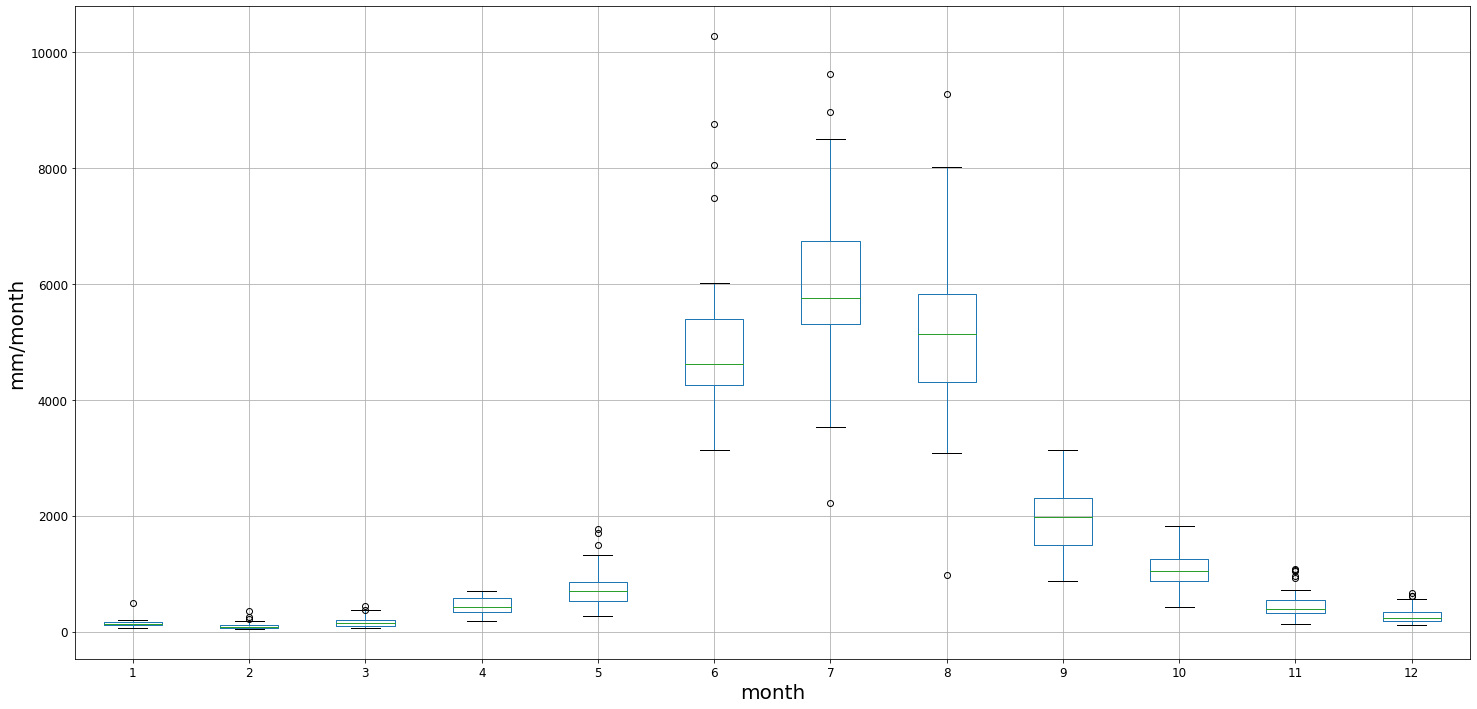

In [112]:
monthwise.T.boxplot(grid = True, figsize=(25,12),fontsize='large')
plt.ylabel('mm/month',fontsize=20)
plt.xlabel('month',fontsize=20)
plt.savefig('boxplot_prec_monthwise.jpg',bbox_inches='tight', dpi=300)

In [113]:
monthwise.round(2)

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
month,,,,,,,,,,,,,,,,,,,,,
1,71.02,114.60,112.11,149.25,181.84,163.98,120.46,200.21,158.80,140.52,...,171.84,137.91,143.19,143.36,205.54,137.16,167.14,103.56,488.23,138.34
2,74.28,85.44,76.12,246.24,102.06,73.18,81.90,68.56,103.70,85.55,...,353.25,73.25,112.94,217.78,141.58,185.32,116.67,141.37,189.32,137.02
3,160.16,56.34,53.93,268.27,246.27,164.55,90.06,118.71,198.11,79.44,...,183.16,94.96,436.68,206.28,211.80,217.43,153.91,179.20,209.45,379.80
4,532.46,372.08,188.04,582.79,409.65,323.46,310.25,545.56,417.55,255.40,...,326.26,374.67,516.11,284.67,259.82,469.78,321.14,581.04,677.28,583.65
5,588.90,574.88,421.77,499.68,633.93,436.66,535.94,565.37,604.06,1016.74,...,714.47,833.09,794.78,724.67,867.95,1208.57,454.00,549.96,1773.01,980.92
6,4851.47,8758.08,4362.28,8062.85,10282.60,4609.40,5020.10,5424.14,5140.57,7479.59,...,4546.61,4255.58,4646.49,4409.33,4825.92,5722.12,3791.16,3876.83,4811.59,4223.17
7,5404.54,8973.48,7804.51,2225.72,5380.21,5680.39,5603.03,4101.69,3537.32,6894.05,...,5158.62,7303.15,8470.54,5420.64,5999.95,6699.33,8503.12,5801.41,5628.58,6758.58
8,5066.64,9285.94,6223.83,974.70,7348.96,3079.82,5471.52,3335.31,6891.81,4324.55,...,3138.37,5187.75,4531.85,5675.58,4903.40,4097.59,7197.66,5696.76,5619.77,5474.78
9,2398.75,1968.64,2577.46,1203.91,1049.36,1194.57,1090.11,2830.67,1244.58,1406.10,...,1909.62,1781.62,1775.58,2014.49,2311.10,881.51,3133.09,2543.14,2139.53,1994.59


In [114]:
# fig,ax=plt.subplots(2)
# ax[0].plot(monthwise.loc[:,1990])

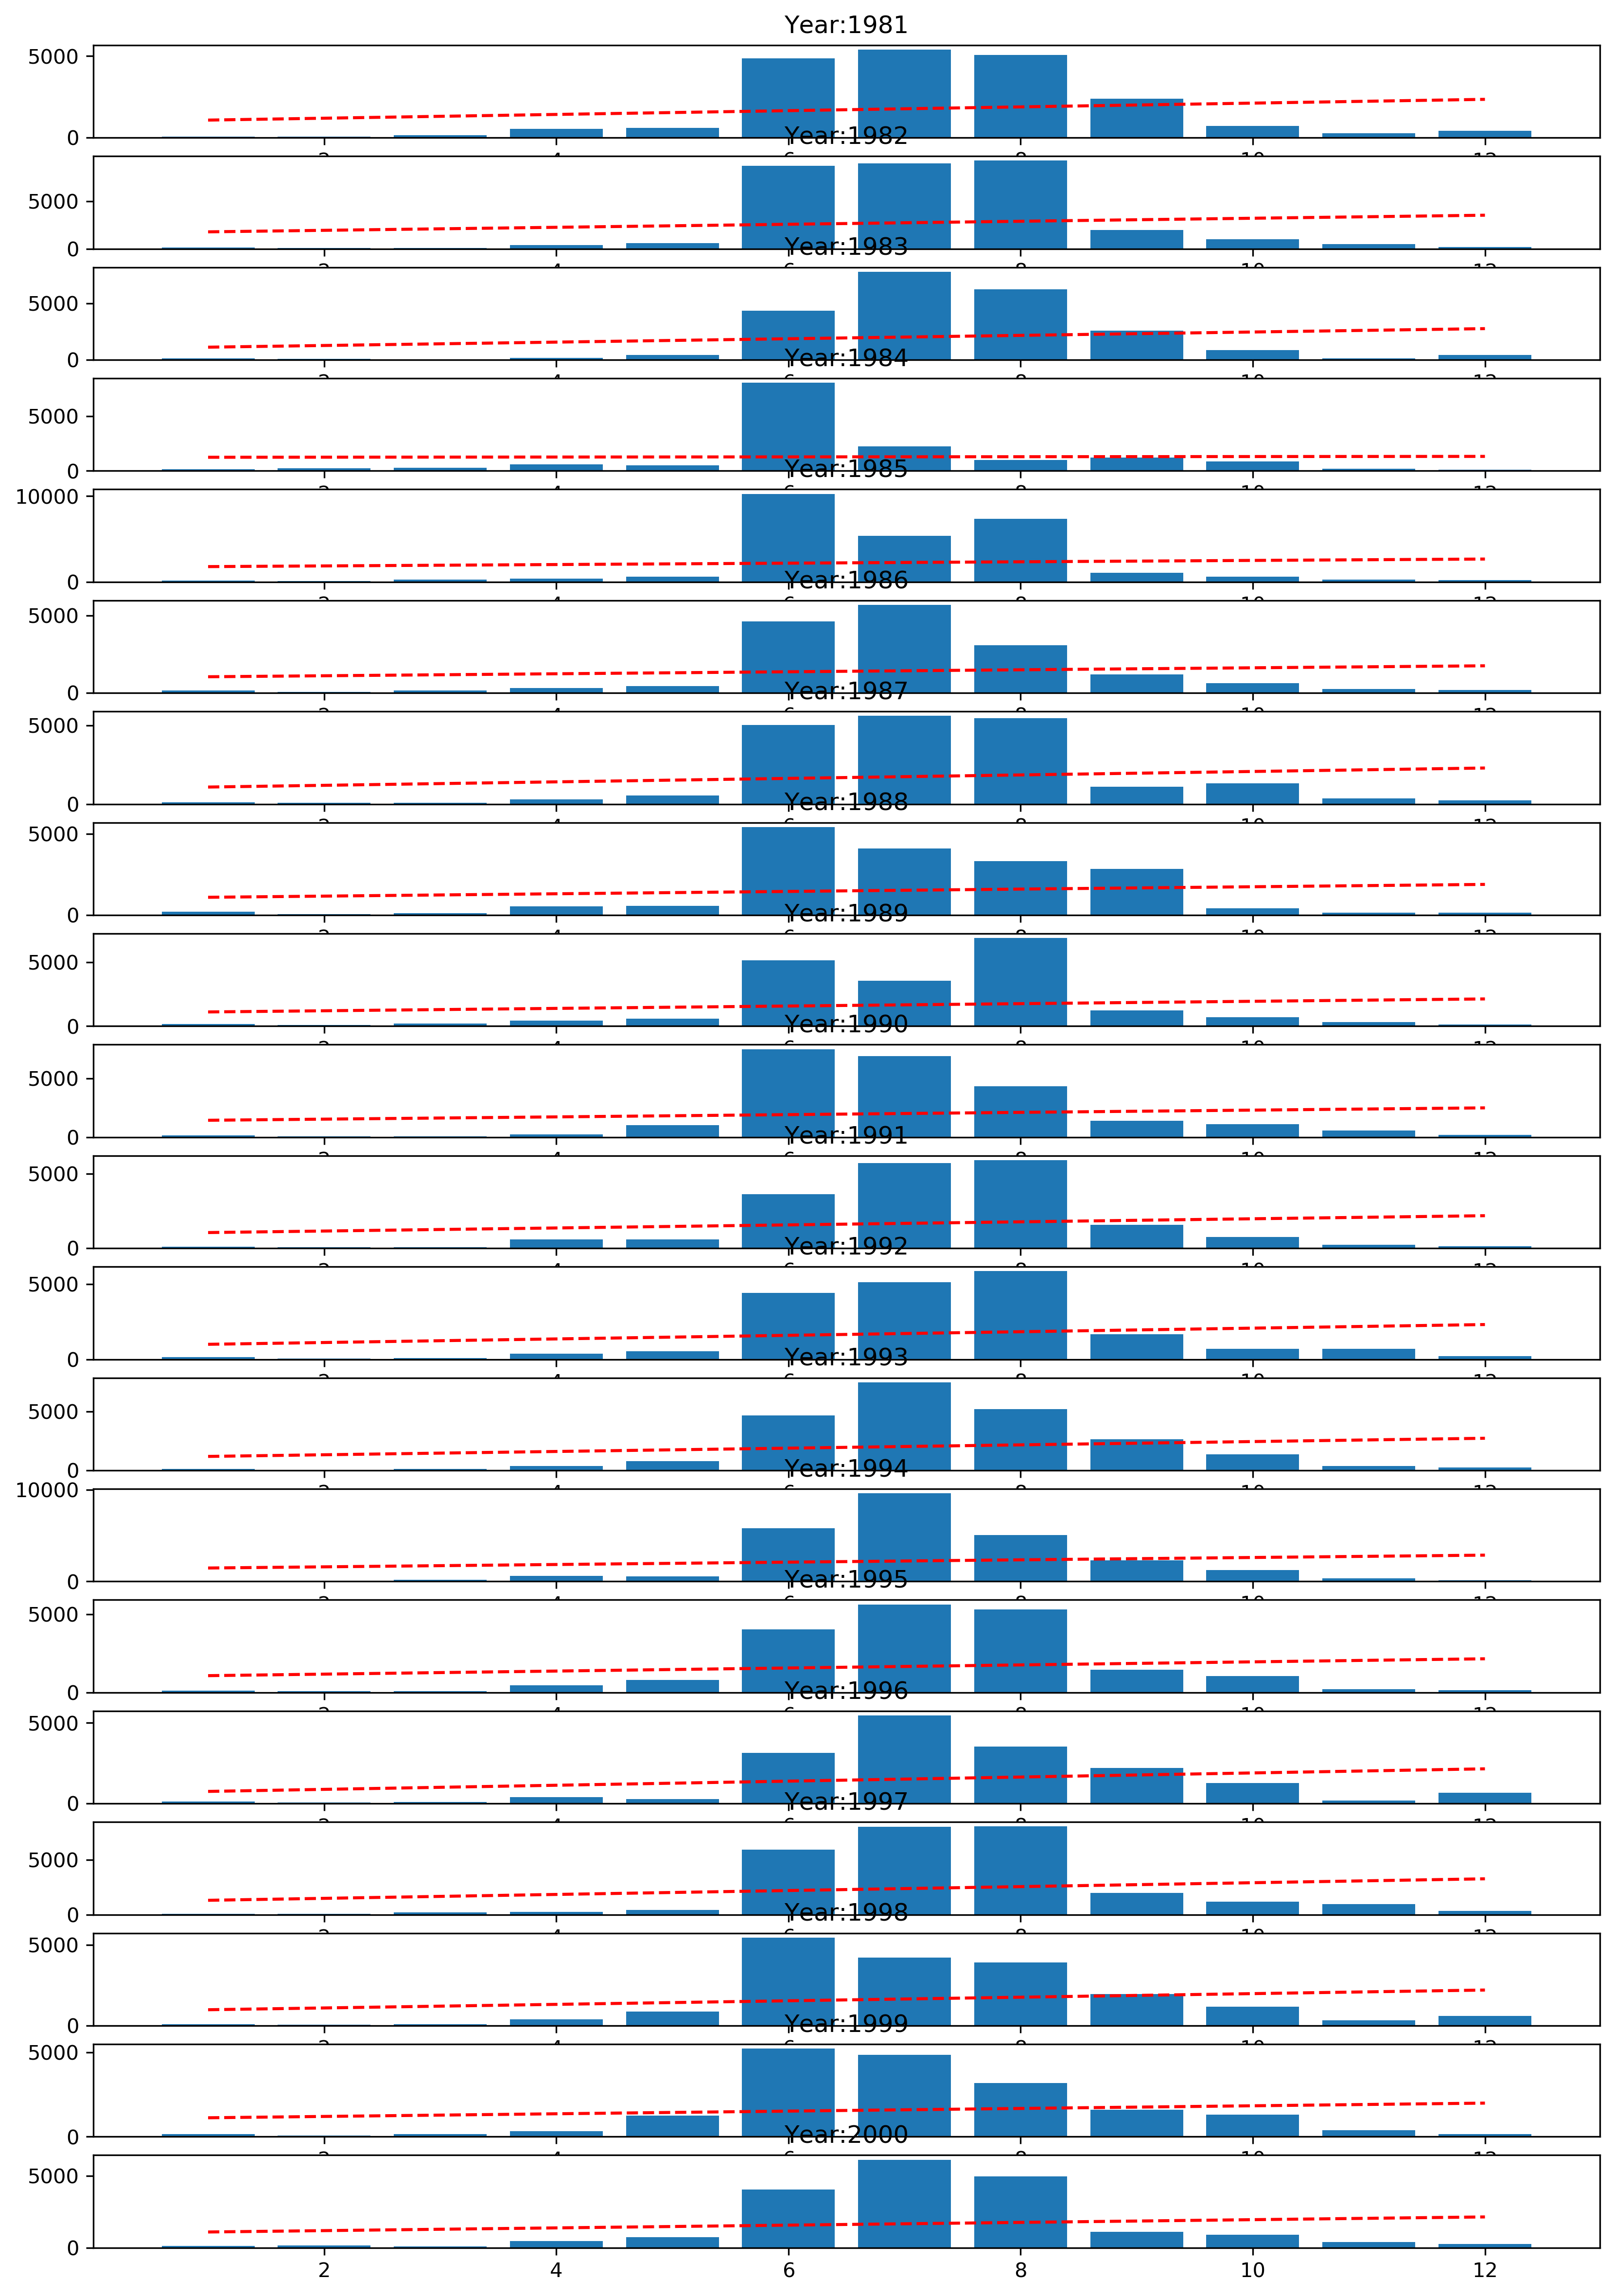

In [115]:
fig,ax=plt.subplots(20,figsize=(13.33,20),dpi=300)
# fig.suptitle('precipitation(mm) across the months year wise- Talamalai', fontsize=20)
# for m in monthwise.index:
for y in col_year[0:20]:
    z = np.polyfit(monthwise.index,monthwise.loc[:,y],1)
    p = np.poly1d(z)
    ax[y-1981].plot(monthwise.index,p(monthwise.index),"r--")
    ax[y-1981].bar(monthwise.index,monthwise.loc[:,y])
    ax[y-1981].set_title('Year:'+str(y))
    
fig.savefig('yearwise across months.jpg')

In [116]:
monthwise.index[6:12]

Int64Index([7, 8, 9, 10, 11, 12], dtype='int64', name='month')

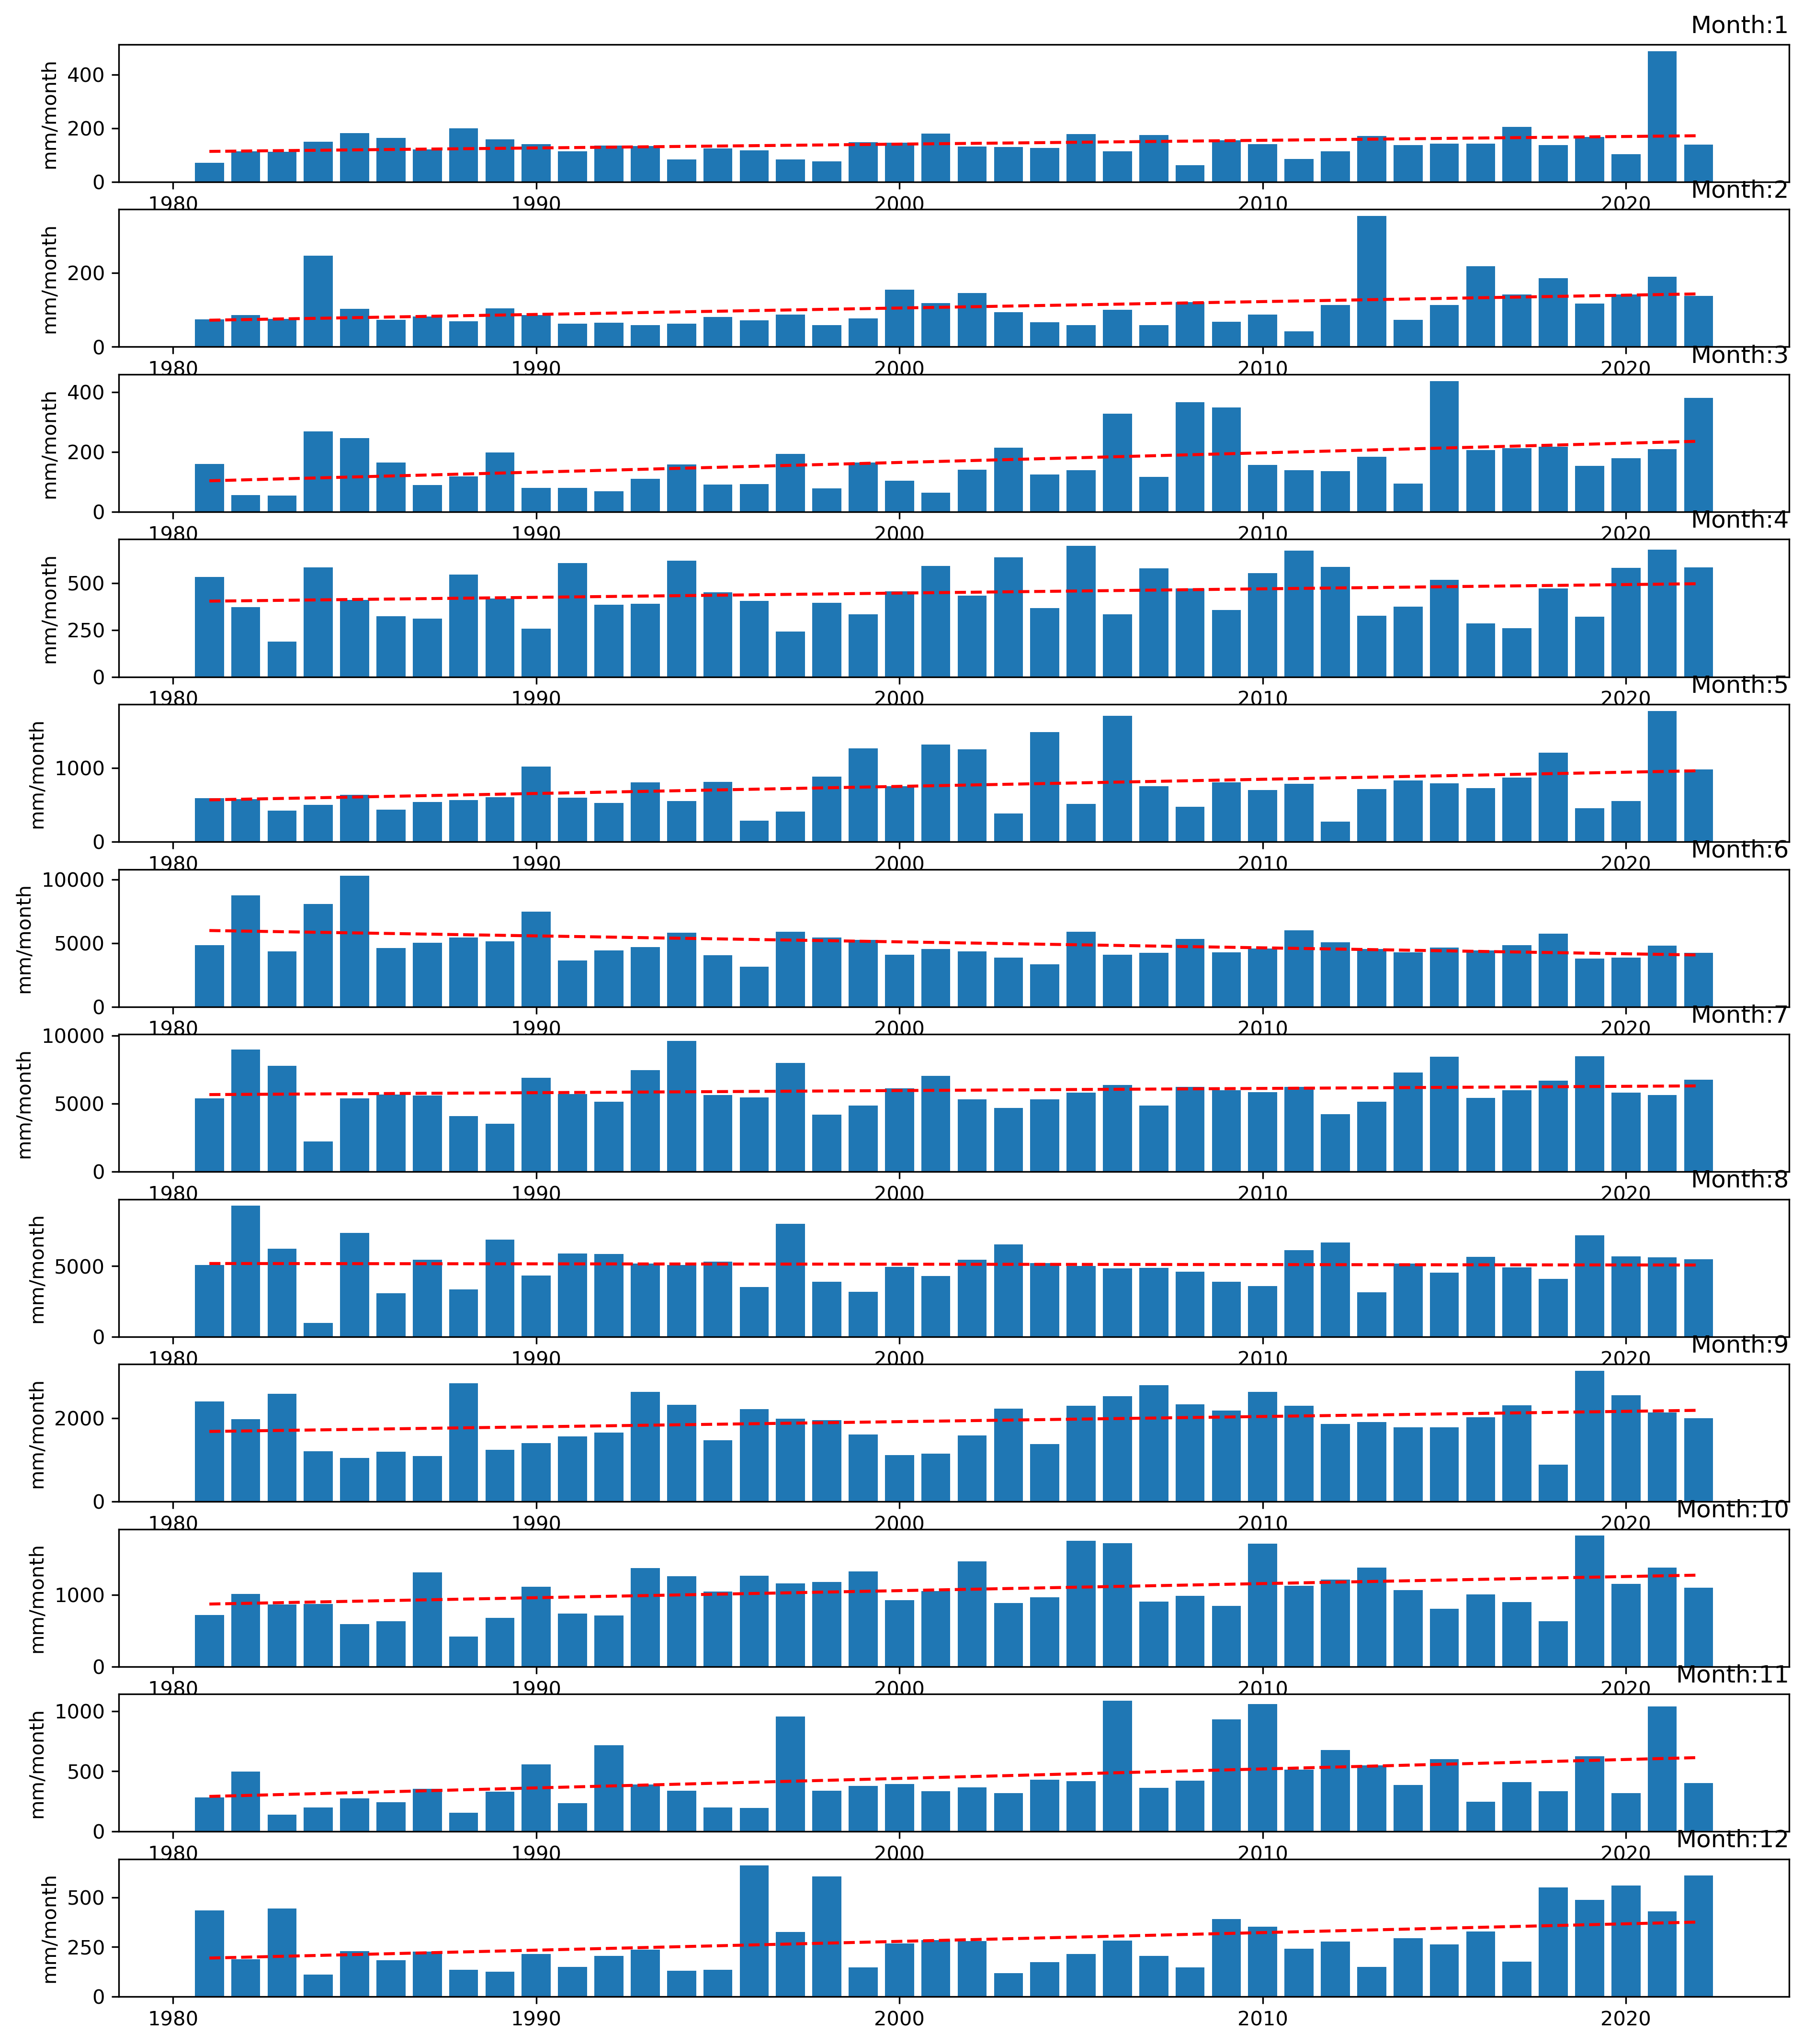

In [117]:
fig,ax=plt.subplots(12,figsize=(15,18),dpi=300)
# fig.suptitle('precipitation(mm) across the year month wise-Talamalai', fontsize=20)
for m in monthwise.index[0:12]:
    z = np.polyfit(monthwise.columns,monthwise.loc[m,:], 1)
    p = np.poly1d(z)
    ax[m-1].plot(monthwise.columns,p(monthwise.columns),"r--")
    ax[m-1].bar(monthwise.columns,monthwise.loc[m,:])
    ax[m-1].set_title('Month:'+str(m), loc='right', fontsize=12)
    
for ax in ax.flat:
    ax.set(ylabel='mm/month')
    
fig.savefig('mm-monthwise(1-6) across years.jpg',bbox_inches='tight')

In [118]:
R10mm={}
for i in col_year[0:-1]:
    R10mm[i]=np.sum(year_wise.loc[:,i]>10)
    

<BarContainer object of 42 artists>

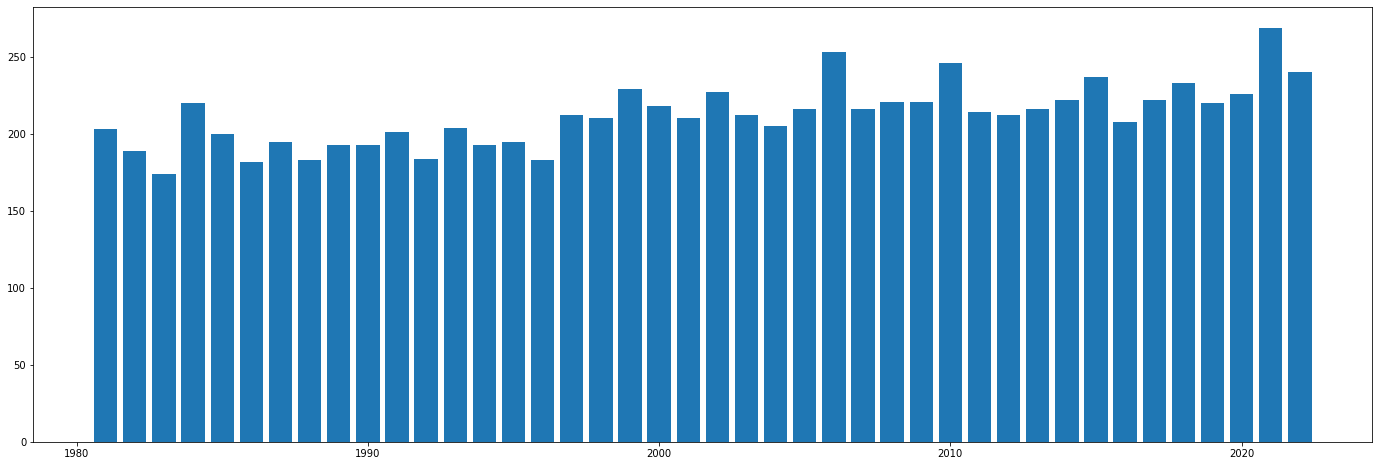

In [119]:
fig=plt.figure(figsize=(24,8))
plt.bar(list(R10mm.keys()),list(R10mm.values()))

In [120]:
import numpy as np
import itertools as itr
CDD=[]
for year in col_year[0:-1]:
    #Import daily rainfall time series#
    rain_series = year_wise.loc[:,year]

    #separate the group of zero values (dry days) in a list of lists#
    d = [list(x[1]) for x in itr.groupby(rain_series, lambda x: x < 1) if x[0]]

    #Count the lengths of different dry spells and maximum dry spell#
    d_len = [len(f) for f in d]
    CDD.append(max(d_len))

#Calculate the mean dry period#
# mean_dry_spell = np.mean(d_len)


<BarContainer object of 42 artists>

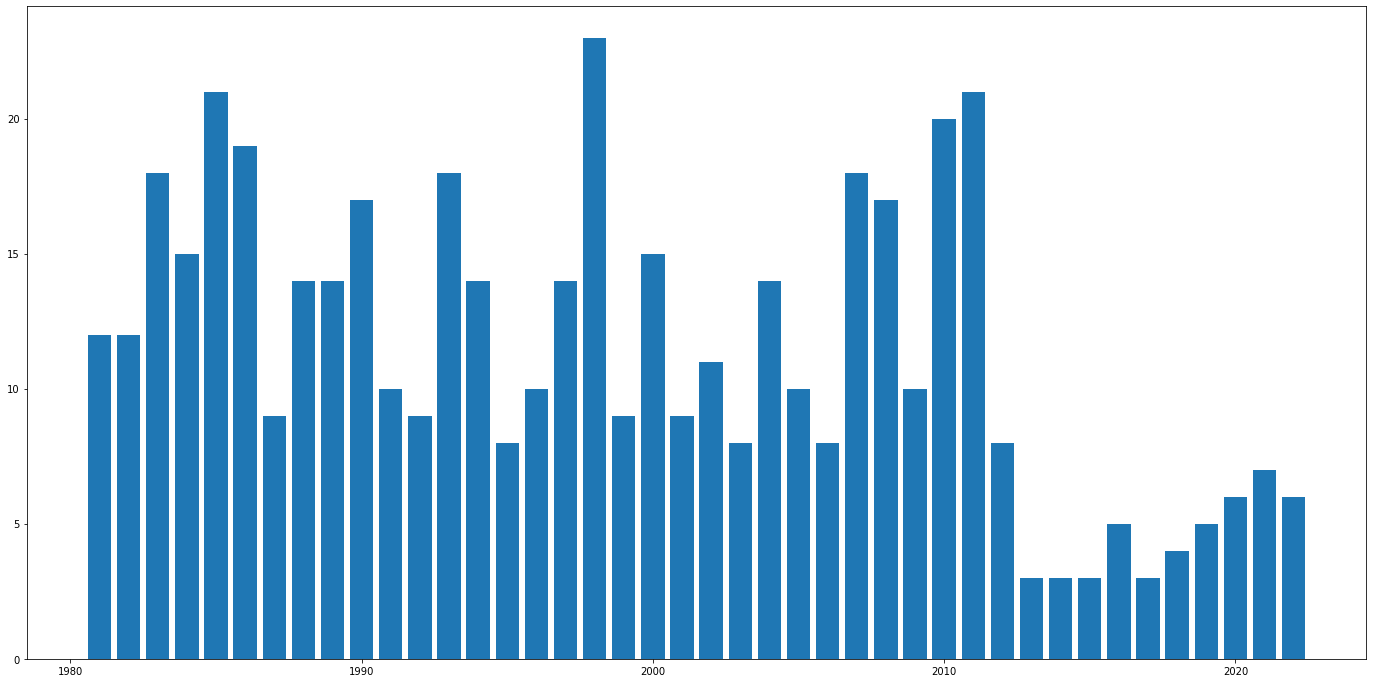

In [121]:
plt.figure(figsize=(24,12))
plt.bar(col_year[0:-1],CDD)

In [122]:
# print(x[0],list(x[1]))

In [128]:
import numpy as np
import itertools as itr
CWD=[]
for year in col_year[0:-1]:
    #Import daily rainfall time series#
    rain_series = year_wise.loc[:,year]

    #separate the group of zero values (dry days) in a list of lists#
    d = [list(x[1]) for x in itr.groupby(rain_series, lambda x: x > 10) if x[0]]

    #Count the lengths of different wet spells and maximum wet spell#
    d_len = [len(f) for f in d]
    CWD.append(max(d_len))

#Calculate the mean dry period#
# mean_dry_spell = np.mean(d_len)

<BarContainer object of 42 artists>

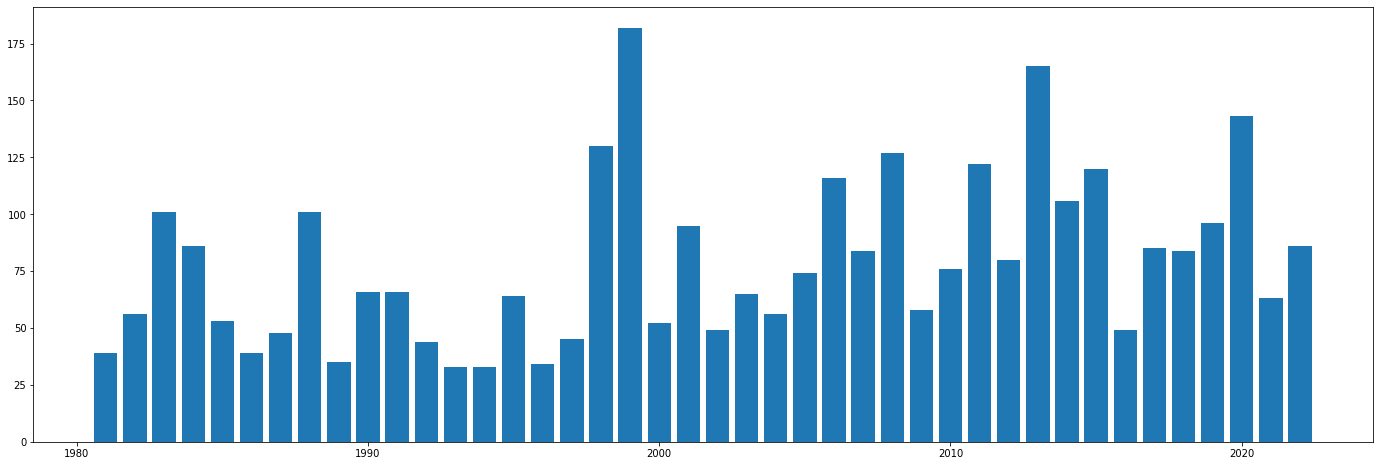

In [129]:
plt.figure(figsize=(24,8))
plt.bar(col_year[0:-1],CWD)

In [130]:
# d_len

In [131]:
WD={}
for i in col_year[0:-1]:
    WD[i]=np.sum(year_wise.loc[:,i]>10)
WD

{1981: 203,
 1982: 189,
 1983: 174,
 1984: 220,
 1985: 200,
 1986: 182,
 1987: 195,
 1988: 183,
 1989: 193,
 1990: 193,
 1991: 201,
 1992: 184,
 1993: 204,
 1994: 193,
 1995: 195,
 1996: 183,
 1997: 212,
 1998: 210,
 1999: 229,
 2000: 218,
 2001: 210,
 2002: 227,
 2003: 212,
 2004: 205,
 2005: 216,
 2006: 253,
 2007: 216,
 2008: 221,
 2009: 221,
 2010: 246,
 2011: 214,
 2012: 212,
 2013: 216,
 2014: 222,
 2015: 237,
 2016: 208,
 2017: 222,
 2018: 233,
 2019: 220,
 2020: 226,
 2021: 269,
 2022: 240}

In [132]:
# list(WD.keys())

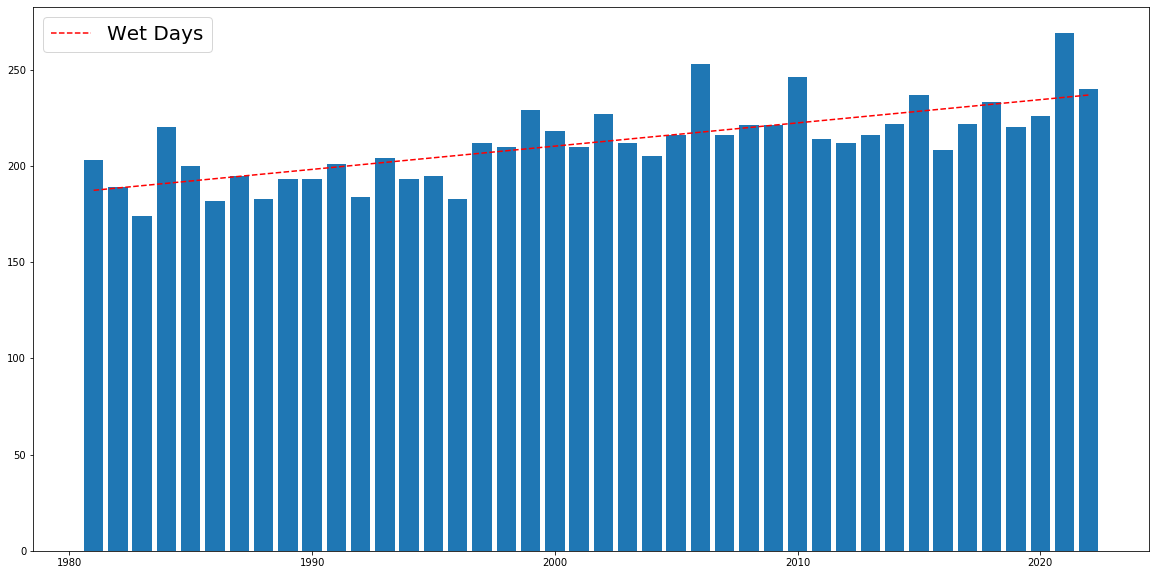

In [133]:
plt.figure(figsize=(20,10))
z = np.polyfit(list(WD.keys()),list(WD.values()),1)
p = np.poly1d(z)
plt.plot(list(WD.keys()),p(list(WD.keys())),"r--")
plt.bar(WD.keys(),WD.values())
plt.legend(['Wet Days'],fontsize=20)
plt.savefig('WD',bbox_inches='tight')



<BarContainer object of 42 artists>

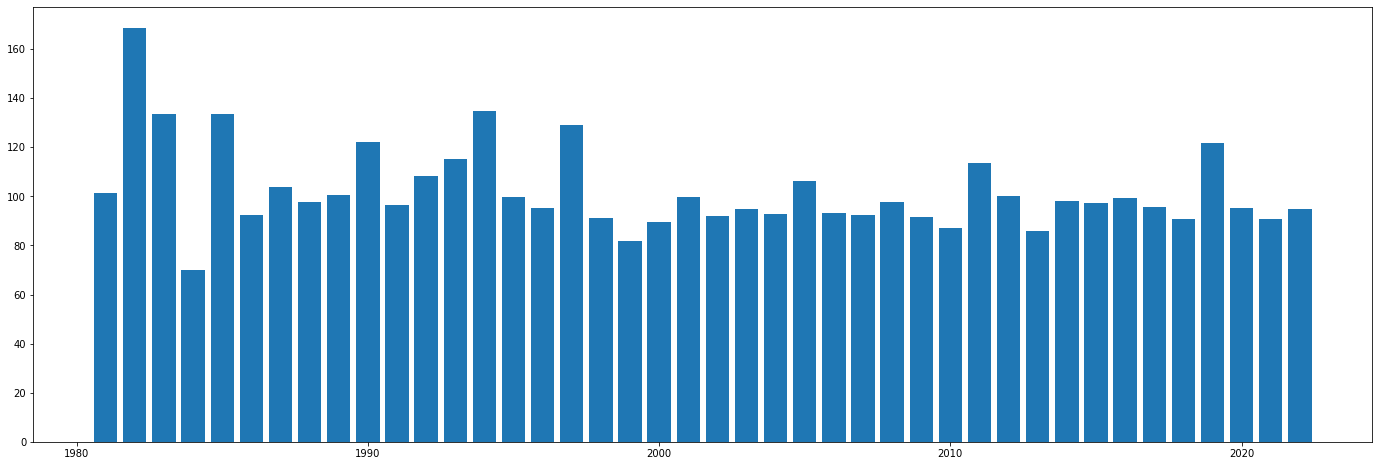

In [134]:
SDII=np.divide(year_wise.sum().ravel(),list(WD.values()))
plt.figure(figsize=(24,8))
plt.bar(WD.keys(),SDII)

In [135]:

RF_analysis={'year':col_year[0:-1],'R10mm':list(R10mm.values()),'CDD':CDD,'CWD':CWD,'WD':list(WD.values()),'SDII':SDII}
RF_analysis
RFA_df=pd.DataFrame(RF_analysis)
RFA_df.to_csv('RF_analysis.csv')

In [136]:
# https://stackoverflow.com/questions/4325733/save-a-subplot-in-matplotlib
#     https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
#         https://www.statology.org/pandas-groupby-index/
#             https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
#                 https://devenum.com/how-to-convert-dict-of-different-lengths-to-dataframe/
#                     https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib

In [137]:
max(year_wise.loc[:,1981])

423.7703

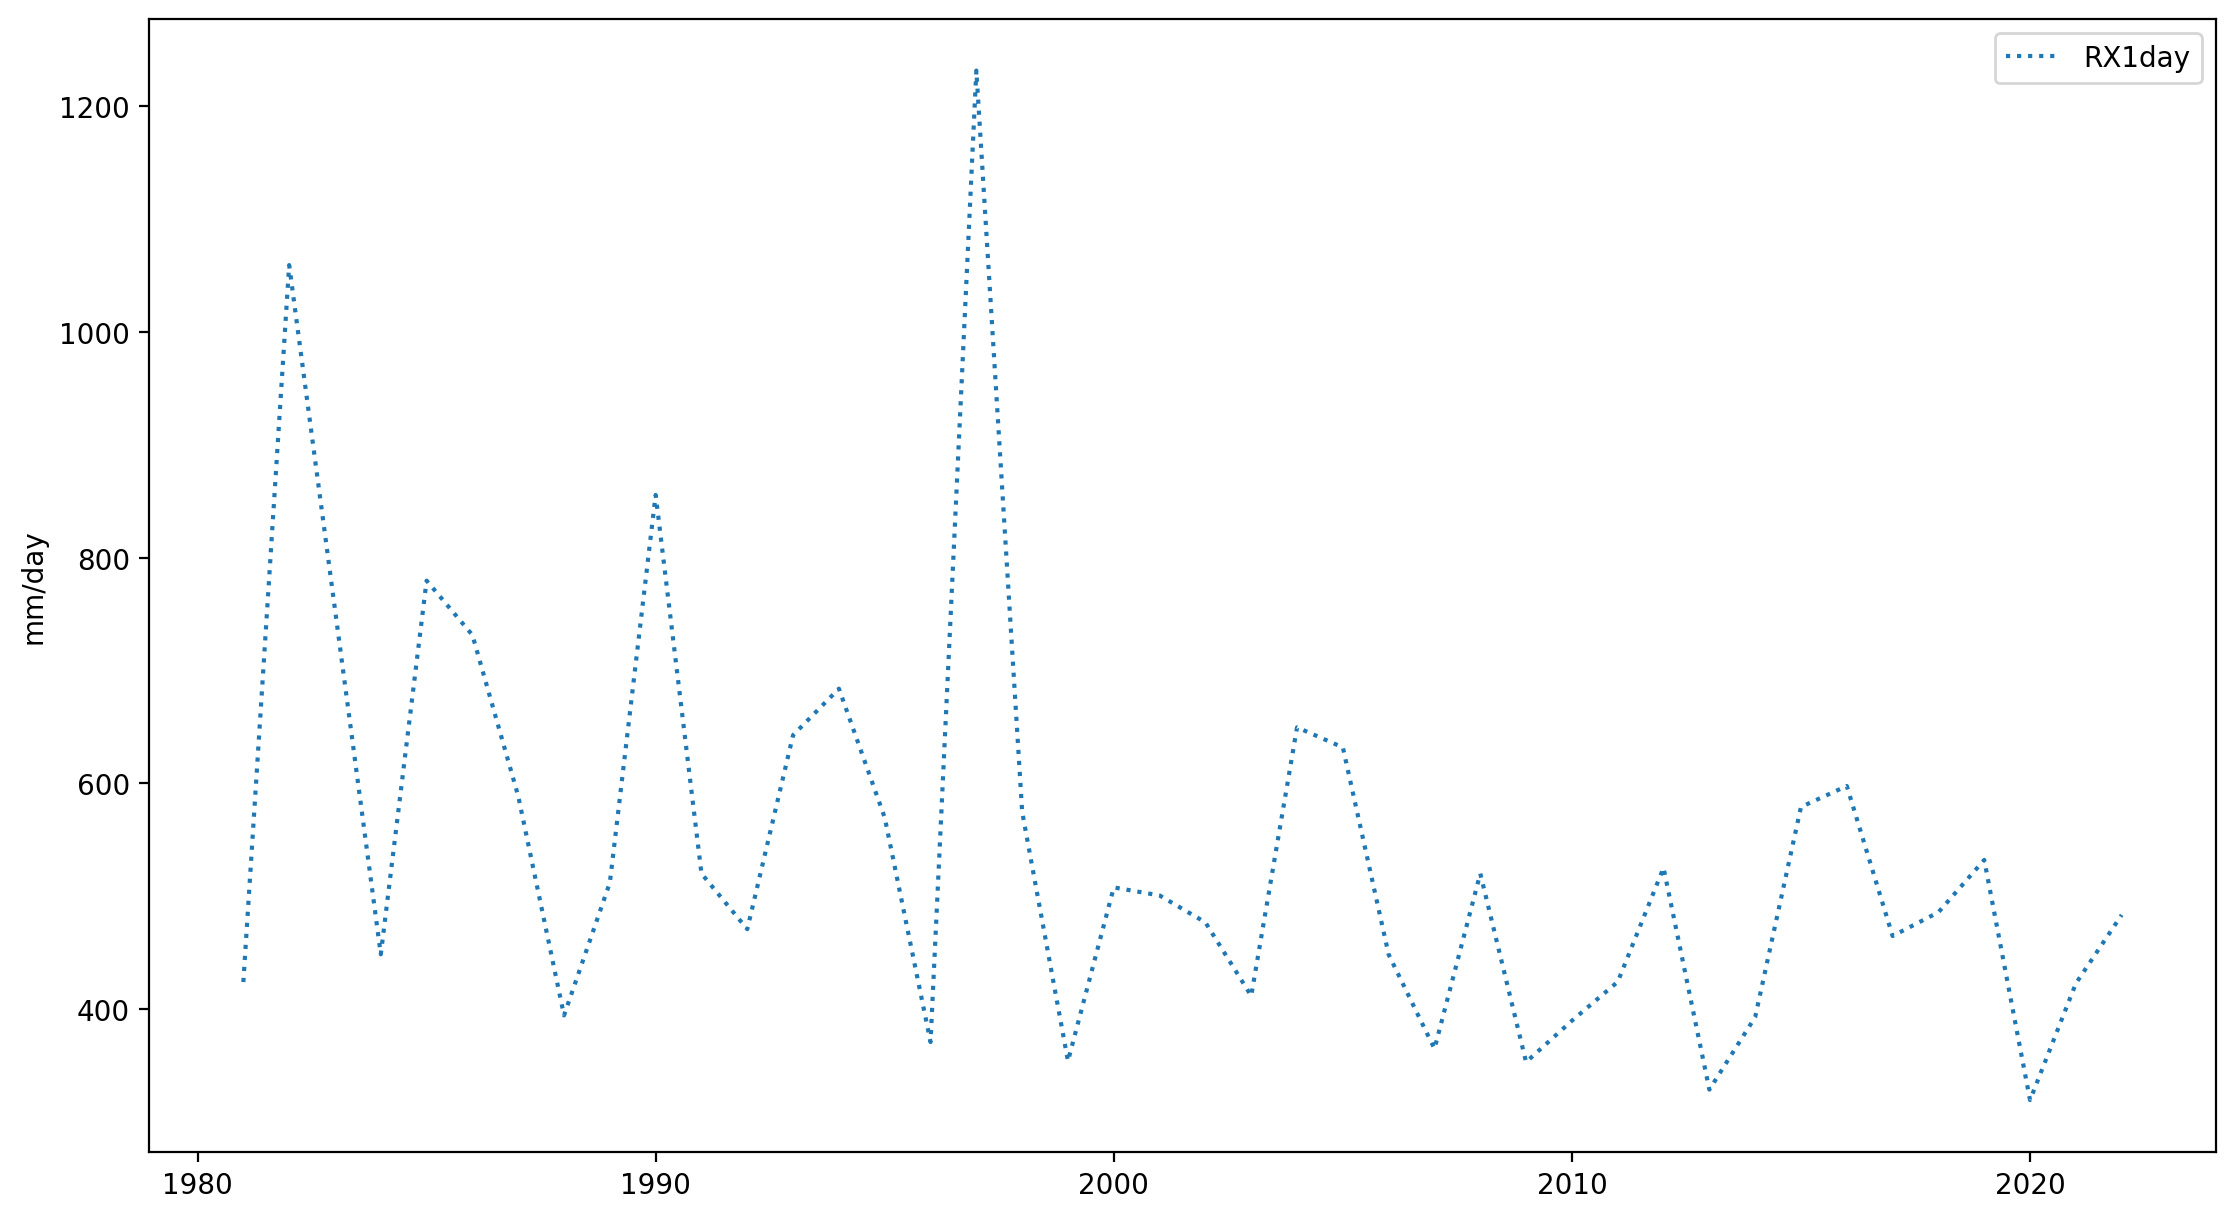

In [138]:
RX1day=year_wise.describe().loc['max']
plt.figure(figsize=(13.33,7.5),dpi=200)
plt.plot(RX1day.keys(),RX1day.values,linestyle='dotted')
plt.legend(['RX1day'])
plt.ylabel('mm/day',fontsize=10)
plt.savefig('RX1day.jpg',bbox_inches='tight')

In [139]:
RX1day.keys()

Int64Index([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64')

NameError: name 'year_wise_norm' is not defined

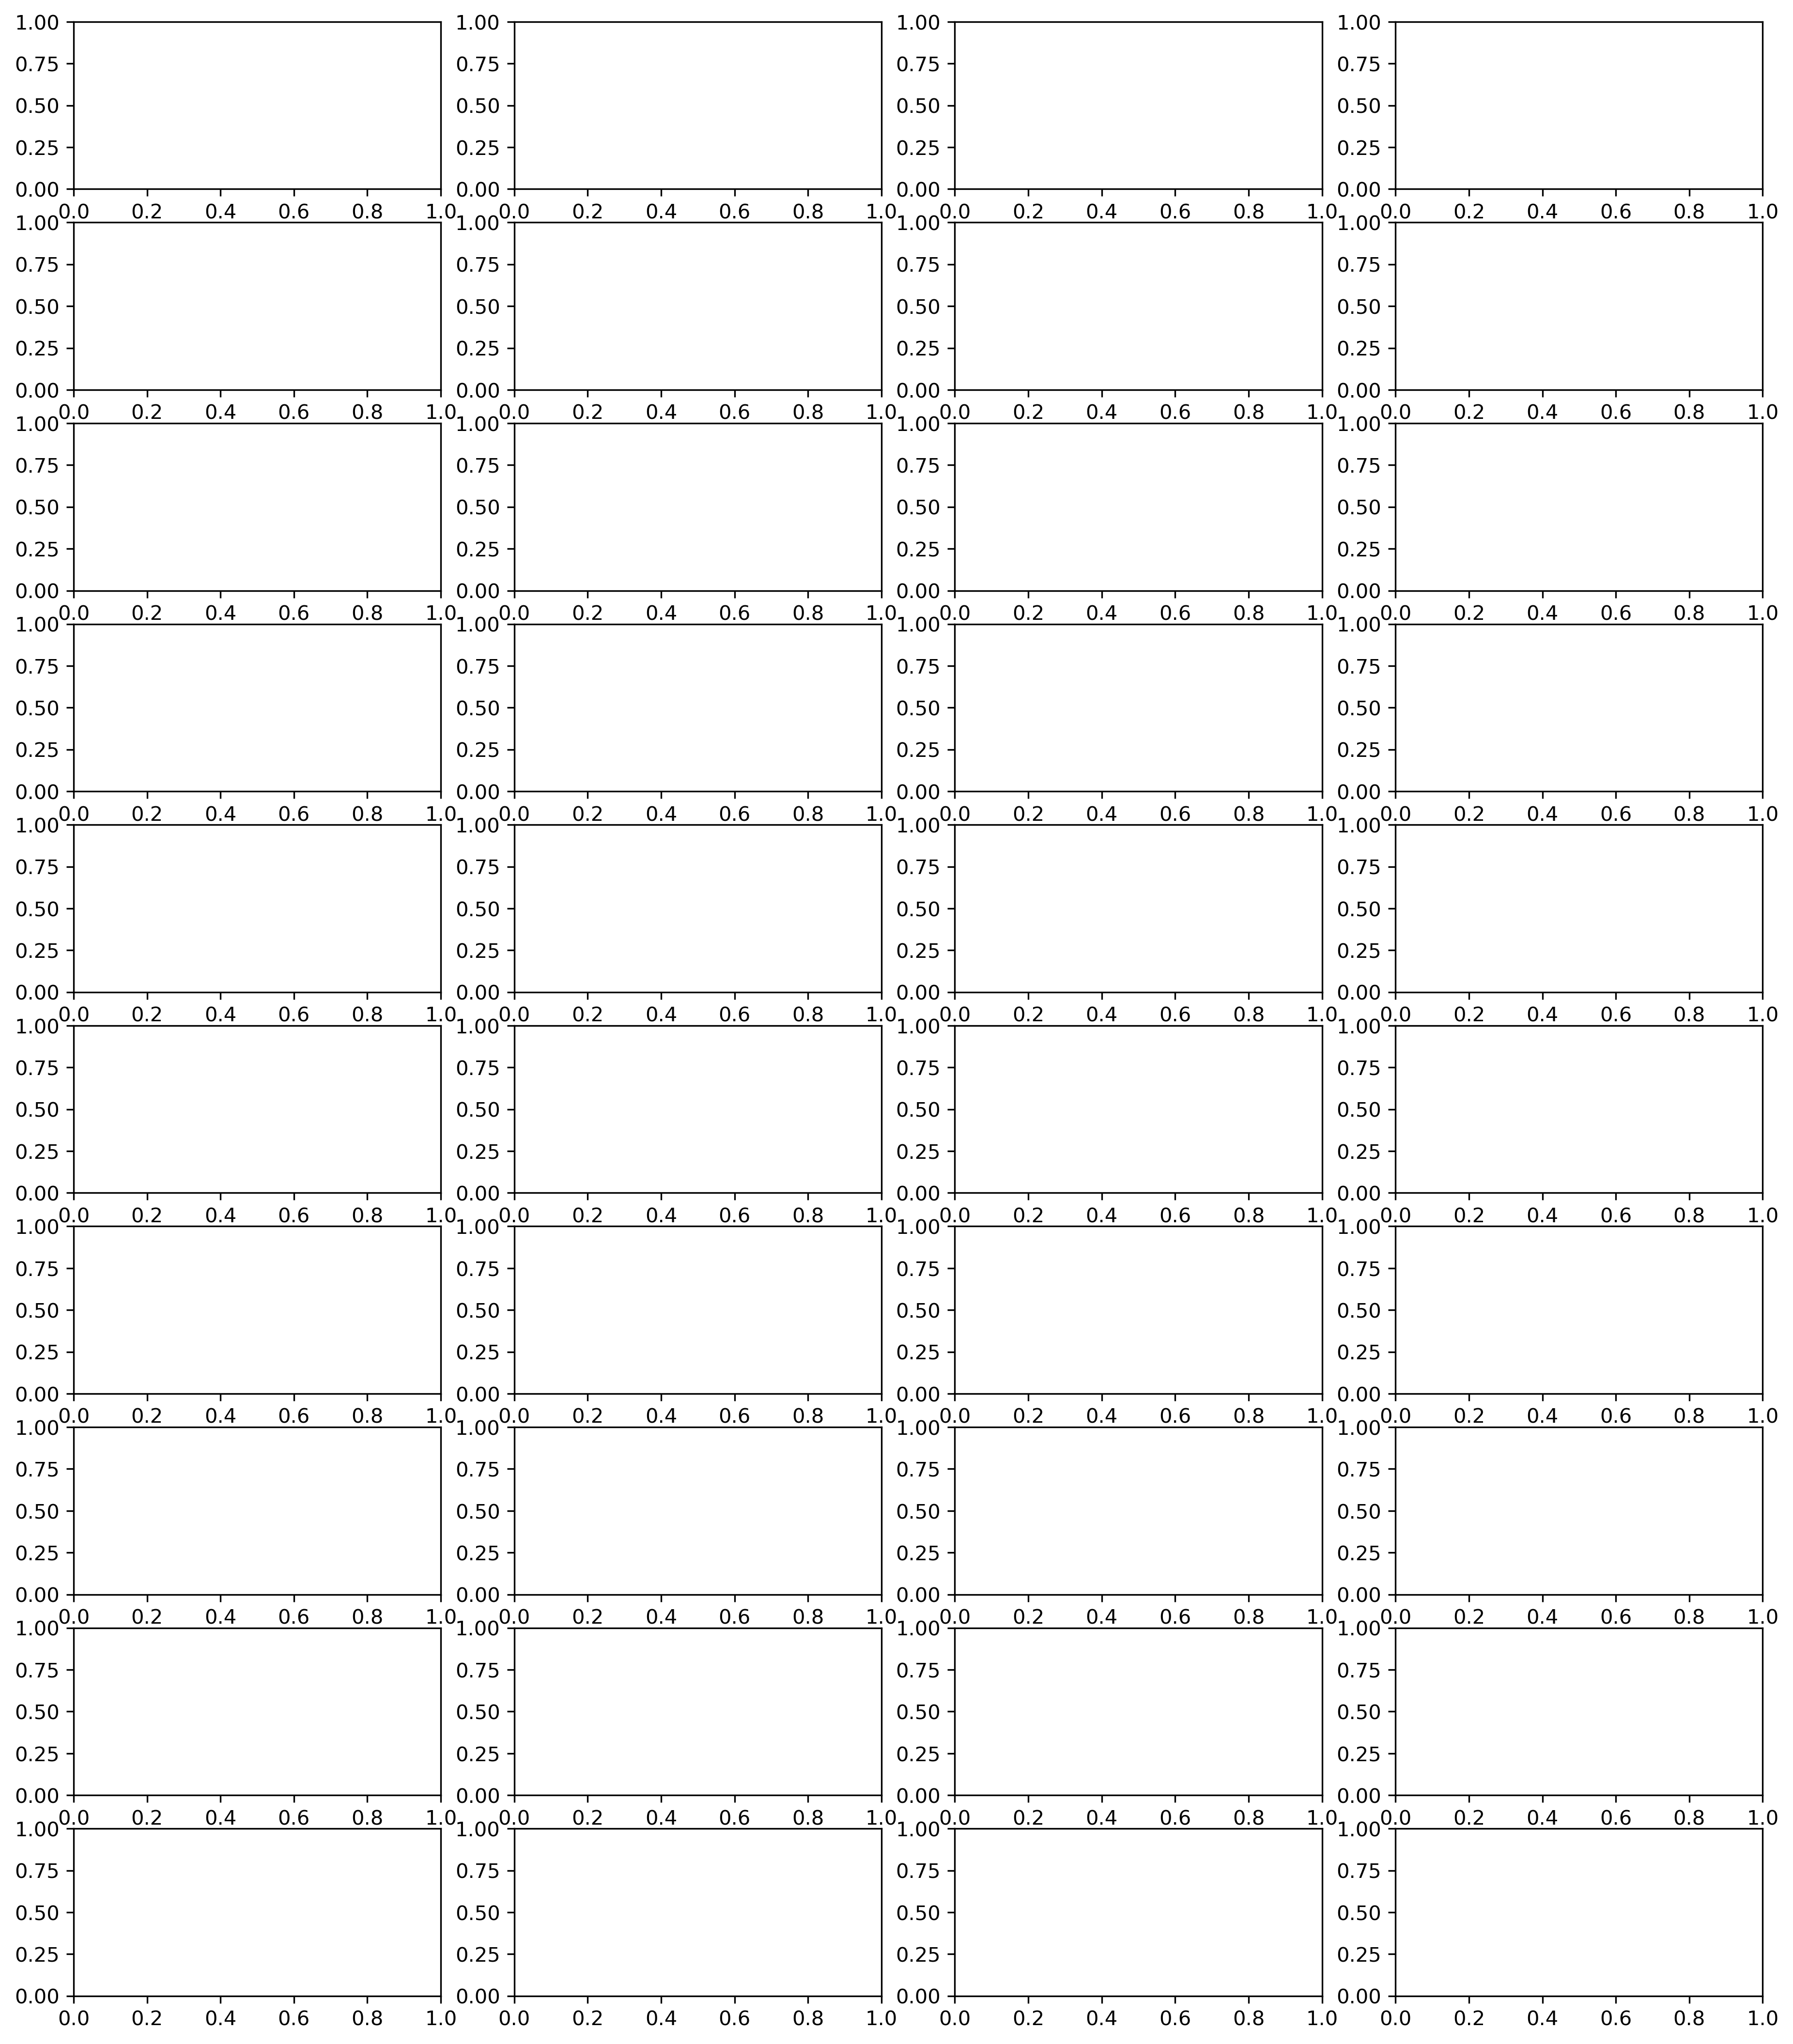

In [71]:
from scipy.stats import norm
import seaborn as sns
# year_wise_norm=(year_wise-year_wise.mean())/year_wise.std()
    
fig,ax=plt.subplots(10,4,figsize=(15,18),dpi=300)  
a=ax.ravel()
for idx,ax in enumerate(a):
    year=1982+idx
    data=year_wise_norm.loc[9:10,year]
#     ax.hist(stats.norm(data))
    ax.set_title(year)
    
#     mu, std = norm.fit(data) 
    sns.lineplot(data,norm.pdf(data),ax=ax,markers=True)
  
    # Plot the PDF.
#     xmin, xmax = plt.xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = norm.pdf(data, mu, std)
#     ax.plot(p, 'k', linewidth=2)
    

#     print(year)
#     ax.set_xlabel(xaxes[idx])
#     ax.set_ylabel(yaxes[idx])

plt.tight_layout()
plt.savefig('hist_years',bbox_inches='tight')

In [ ]:
plt.figure(figsize=(20,25))
for year in col_year[0:-1]:
    data=year_wise_norm.loc[9:11,year]
    sns.lineplot(data,norm.pdf(data))
plt.legend(labels=col_year[0:-1])
plt.savefig('hist_yea',bbox_inches='tight')

In [ ]:
col_year

In [ ]:
import seaborn as sns
from scipy import stats
data=year_wise.loc[9:10,2021]

sns.lineplot(data,norm.pdf(data))

In [ ]:
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
sns.lineplot(x, norm.pdf(x),
        lw=5, alpha=0.6, label='norm pdf')


In [ ]:
sns.histplot(year_wise.loc[9:11,2021])
plt.show()

In [ ]:
from scipy.stats import norm
import seaborn as sns
# year_wise_norm=(year_wise-year_wise.mean())/year_wise.std()
    
fig,ax=plt.subplots(10,4,figsize=(15,18),dpi=300)  
a=ax.ravel()
for idx,ax in enumerate(a):
    year=1982+idx
    data=year_wise.loc[7:8,year]
#     ax.hist(stats.norm(data))
    ax.set_title(year)
    
#     mu, std = norm.fit(data) 
    sns.histplot(data,ax=ax,kde=True)
#     sns.lineplot(data,norm.pdf(data),ax=ax,markers=True)
  
    # Plot the PDF.
#     xmin, xmax = plt.xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = norm.pdf(data, mu, std)
#     ax.plot(p, 'k', linewidth=2)
    

#     print(year)
#     ax.set_xlabel(xaxes[idx])
#     ax.set_ylabel(yaxes[idx])

plt.tight_layout()
plt.savefig('hist_years',bbox_inches='tight')